### Task 1: Data evaluation and Regression Model analysis (data_matrix.csv)

#### Load data


In [11]:
import pandas as pd
data = pd.read_csv("C:\\Users\\nagaj\\Music\\Playlists\\Case_study_student (2)\\Case_study_student\\data_matrix.csv", sep=';')
df = pd.DataFrame(data)
df = df.drop('Run', axis = 1)
df.head()

,input_1,input_2,input_3,output_1,output_2
0,0.00,10.0,1.500,-0.24,24.758279
1,2.50,5.0,2.750,-3.70,41.787849
2,-2.50,15.0,0.250,6.18,5.985490
3,-1.25,7.5,2.125,-7.75,37.442063
4,3.75,17.5,-0.375,25.33,4.546249


#### Sensitivity analysis


<Axes: >

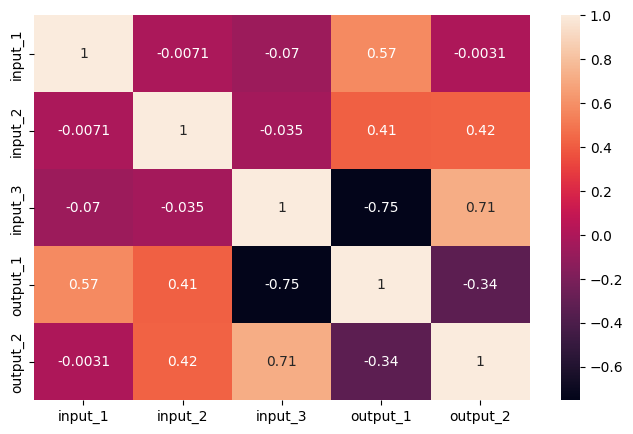

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define figure size
plt.figure(figsize=(8, 5))  # Adjust width and height as needed
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)

#### Assess distribution of output variables


In [4]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Output_1", "Output_2"))

hist1 = go.Histogram(x = df["output_1"], nbinsx = 10)
fig.add_trace(hist1, row = 1, col = 1)

hist2 = go.Histogram(x = df["output_2"], nbinsx = 10)
fig.add_trace(hist2, row = 1, col = 2)

fig.update_xaxes(title_text = "Output_1 Values", row = 1, col = 1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.update_xaxes(title_text ="Output_2 Values", row = 1, col = 2)
fig.update_yaxes(title_text = "Count", row = 1, col = 2)

fig.update_layout(title = "Distribution of Outputs", height = 400, width = 800)
fig.update(layout_showlegend = False)

# Save the Plotly figure as an HTML file
fig.write_html("plotly_output.html")
fig.show()


#### Split data into train and test sets

In [5]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,1:4]
y1 = df['output_1']
y2 = df['output_2']

x_train, x_test, y1_train, y1_test, y2_train, y2_test = train_test_split(x, y1, y2, test_size = 0.2 , random_state = 42)

#### Build  Linear regression & support vector regression models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

lr_output_1 = LinearRegression()
lr_output_1.fit(x_train, y1_train)

lr_output_2 = LinearRegression()
lr_output_2 = lr_output_1.fit(x_train, y2_train)

svr_output_1 = SVR(kernel = 'linear')
svr_output_1.fit(x_train, y1_train)

svr_output_2 = SVR(kernel = 'linear')
svr_output_2.fit(x_train, y2_train)

#### Evaluate regression models of MSE


In [7]:
from sklearn.metrics import mean_squared_error,r2_score
lr_output_1_pred = lr_output_1.predict(x_test)
lr_output_2_pred = lr_output_2.predict(x_test)
svr_output_1_pred = svr_output_1.predict(x_test)
svr_output_2_pred = svr_output_2.predict(x_test)

print('linear regression output_1 mean squared error:', mean_squared_error(y1_test, lr_output_1_pred))
print('linear regression output_2 mean squared error:', mean_squared_error(y2_test, lr_output_2_pred))
print('support vector regression output_1 mean squared error:', mean_squared_error(y1_test, svr_output_1_pred))
print('support vector regression output_2 mean squared error:', mean_squared_error(y1_test, svr_output_2_pred))


linear regression output_1 mean squared error: 3915.676355786971
linear regression output_2 mean squared error: 1073.6944605749077
support vector regression output_1 mean squared error: 0.00281923935082334
support vector regression output_2 mean squared error: 2222.94485021843


#### Evaluate regression models of R2_score


In [8]:
print('linear regression output_1 mean squared error:', r2_score(y1_test, lr_output_1_pred))
print('linear regression output_2 mean squared error:', r2_score(y2_test, lr_output_2_pred))
print('support vector regression output_1 mean squared error:', r2_score(y1_test, svr_output_1_pred))
print('support vector regression output_2 mean squared error:', r2_score(y1_test, svr_output_2_pred))

linear regression output_1 mean squared error: -29.919479971062877
linear regression output_2 mean squared error: 0.6679439868946049
support vector regression output_1 mean squared error: 0.9999777383504863
support vector regression output_2 mean squared error: -16.553110249146812


#### compare models


In [9]:
if mean_squared_error(y1_test, lr_output_1_pred) < mean_squared_error(y1_test, svr_output_1_pred):
    print('Linear regression model for output_1 is better')
else:
    print('Support vector regression model for output_1 is better')
                                                                      
                                                                      
if mean_squared_error(y2_test, lr_output_2_pred) < mean_squared_error(y1_test, svr_output_2_pred):
    print('Linear regression model for output_2 is better')
else:
    print('Support vector regression model for output_2 is better')                                                                    

Support vector regression model for output_1 is better
Linear regression model for output_2 is better


#### Plot predicted vs actual values

In [12]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import random

noise = 0.1 # amount of noise to add to predicted values

output_1_actual = go.Scatter(x=y1_test, y=y1_test, mode='markers', marker=dict(color='black'), name='actual test values', legendgroup='group1')
lr_output_1 = go.Scatter(x=y1_test, y=[val + random.uniform(0, noise) for val in lr_output_1_pred], mode='markers', marker=dict(color='red', symbol='circle'), name='Linear regression pred values', legendgroup='group2')
svr_output_1 = go.Scatter(x=y1_test, y=[val + random.uniform(0, noise) for val in svr_output_1_pred], mode='markers', marker=dict(color='green', symbol='diamond'), name='Support vector regression pred values', legendgroup='group3')

output_2_actual = go.Scatter(x=y2_test, y=y2_test, mode='markers', marker=dict(color='black'), showlegend=False, name='actual test values', legendgroup='group1')
lr_output_2 = go.Scatter(x=y2_test, y=[val + random.uniform(0, noise) for val in lr_output_2_pred], mode='markers', marker=dict(color='red', symbol='circle'), showlegend=False, name='Linear regression pred values', legendgroup='group2')
svr_output_2 = go.Scatter(x=y2_test, y=[val + random.uniform(0, noise) for val in svr_output_2_pred], mode='markers', marker=dict(color='green', symbol='diamond'), showlegend=False, name='Support vector regression pred values', legendgroup='group3')

fig = make_subplots(rows=1, cols=2, subplot_titles=["Output_1", "Output_2"])

fig.add_trace(output_1_actual, row=1, col=1)
fig.add_trace(lr_output_1, row=1, col=1)
fig.add_trace(svr_output_1, row=1, col=1)

fig.add_trace(output_2_actual, row=1, col=2)
fig.add_trace(lr_output_2, row=1, col=2)
fig.add_trace(svr_output_2, row=1, col=2)

fig.update_xaxes(title_text="Actual Values", row=1, col=1)
fig.update_xaxes(title_text="Actual Values", row=1, col=2)
fig.update_yaxes(title_text="Predicted Values", row=1, col=1)
fig.update_yaxes(title_text="Predicted Values", row=1, col=2)

fig.update_layout(height=400, width=800, title="Scatter Plot of Predicted vs Actual Values")

fig.update_layout(
    title={
        'text': "Scatter Plot of Actual vs ML models Predicted values",
        'y': 0.95,
        'x': 0.4,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(
        title=dict(text='Shared Legend'),
        y=1.25,
        x=1.02,
        font=dict(
            family='sans-serif',
            size=10,
            color='black'
        ),
        bgcolor='LightSteelBlue',
        bordercolor='Black',
        borderwidth=1
    )
)
# Save the Plotly figure as an HTML file
fig.write_html("plotly_output.html")
fig.show()

           
